<h1>Laboratory work nr. 1</h1>
<p>Scebec Mihai, IS-211M</p>

In this laboratory we should cover the [graded] tasks from the lab1.pdf file. It starts with importing everything we need and getting the dataset object.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

<h3>1.</h3>
 Now, you are going to perform K−means with real data. The file HCVdata.csv
contains laboratory values of blood donors and Hepatitis C patients and demographic values
like age. There are 12 variables, features 4-12 concern laboratory data (ALB, ALT, AST, BIL,
CHE, CHOL, CREA, GGT and PROT). Import the data set and get familiar with the data.
Answer the following questions : how many observations are there ? How many variables are
there ? What type of variables (numeric, categorical) ? For each categorical variable (if any)
give the number of levels and categories. You will denote the resulting dataframe object dfHVC.

In [2]:
# 1.    import the dataset 
dfHVC = pd.read_csv('HCVdata.csv', sep=';')
# I'll drop unnamed field for later 
# dfHVC = dfHVC.drop(columns=['Unnamed: 0'])


print(dfHVC.head(3))
#       how many obesravtions are there?
print('Nr. of observations = '+str(dfHVC.count())) #567
#       how many variables are there (minus first 4, right?)
amount = 0
for n in dfHVC.columns:
    amount += 1
print('Nr of variables ='+str(amount-4))
# What types of variables? 
# for categorical variable get number of levels
# -clearly, sex and 'Category' are of type category(and we ignore them), others are all numeric
# sex has males and females, Category has 4 types in it. 
        

   Unnamed: 0       Category Sex  Age   ALB   ALT   AST  BIL    CHE  CHOL  \
0           1  0=Blood Donor   m   32  38.5   7.7  22.1  7.5   6.93  3.23   
1           2  0=Blood Donor   m   32  38.5  18.0  24.7  3.9  11.17  4.80   
2           3  0=Blood Donor   m   32  46.9  36.2  52.6  6.1   8.84  5.20   

    CREA   GGT  PROT  
0  106.0  12.1  69.0  
1   74.0  15.6  76.5  
2   86.0  33.2  79.3  
Nr. of observations = Unnamed: 0    567
Category      567
Sex           567
Age           567
ALB           567
ALT           567
AST           567
BIL           567
CHE           567
CHOL          567
CREA          567
GGT           567
PROT          567
dtype: int64
Nr of variables =9


<h3>2.</h3>
Since all the clustering approaches used in this lab are based upon distances
or dissimilarity measures, it is strongly recommended to scale the variables previously. The
following code allows to scale all the variables in a dataframe called dfHVC.
<p>
Create a dataframe containing all the numeric variables after being scaled, you will name the
resulting output dfHVC_scaled.

In [3]:
#  2.    scale all the variables in a dataframe
scaler = StandardScaler()
# first I want to get all numeric variables
newdf = dfHVC.select_dtypes(include=np.number)
dfHVC_scaled = pd.DataFrame(scaler.fit_transform(newdf[newdf.columns]), columns = newdf.columns)
newdf.columns



Index(['Unnamed: 0', 'Age', 'ALB', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA',
       'GGT', 'PROT'],
      dtype='object')

In [4]:
#  3.   perform k mean clustering by example
dfHVC_Kmeans4_scaled = KMeans(n_clusters = 4, n_init = 50, random_state = 1000).fit(dfHVC_scaled)
dfHVC_Kmeans4_original = KMeans(n_clusters = 4, n_init = 50, random_state = 1000).fit(dfHVC[newdf.columns])

#  calculate the matching matrix and interpret the results by trying to match each real group to a given 
#  cluster detected by the algorithm.
cross_original = pd.crosstab(dfHVC.Category, dfHVC_Kmeans4_original, rownames=['Real groups'], colnames= ['K_Mean clusters'])
cross_scaled = pd.crosstab(dfHVC.Category, dfHVC_Kmeans4_scaled, rownames=['Real groups'], colnames= ['K_Mean clusters'])


# 0=Blood Donor, 1=Hepatitis, 2=Fibrosis and
# 3=Cirrhosis
print(cross_original)
print(' =- = -= -= -= - -= = -= -= ')
print(cross_scaled)



K_Mean clusters  KMeans(n_clusters=4, n_init=50, random_state=1000)
Real groups                                                        
0=Blood Donor                                                  496 
1=Hepatitis                                                     23 
2=Fibrosis                                                      20 
3=Cirrhosis                                                     28 
 =- = -= -= -= - -= = -= -= 
K_Mean clusters  KMeans(n_clusters=4, n_init=50, random_state=1000)
Real groups                                                        
0=Blood Donor                                                  496 
1=Hepatitis                                                     23 
2=Fibrosis                                                      20 
3=Cirrhosis                                                     28 


In [5]:
dfHVC_scaled['clusterization_results'] = dfHVC_Kmeans4_scaled.labels_
hcv_complete_matrix = linkage(dfHVC_scaled, 'complete')
hcv_single_matrix = linkage(dfHVC_scaled, 'single')
hcv_average_matrix = linkage(dfHVC_scaled, 'average')
# print(cut_tree(exo1_hc_complete, n_clusters = 2))
dfHVC_single_cross =  pd.crosstab(dfHVC.Category, columns = cut_tree(hcv_single_matrix, n_clusters=4).T[0] , rownames=['Real groups'], colnames= ['K_Mean clusters'])
dfHVC_complete_cross = pd.crosstab(dfHVC.Category, columns = cut_tree(hcv_complete_matrix, n_clusters=4).T[0] , rownames=['Real groups'], colnames= ['K_Mean clusters'])
dfHVC_average_cross = pd.crosstab(dfHVC.Category, columns = cut_tree(hcv_average_matrix, n_clusters=4).T[0] , rownames=['Real groups'], colnames= ['K_Mean clusters'])

print(dfHVC_single_cross)
print(' =- = -= -= -= - -= = -= -= ')
print(dfHVC_complete_cross)
print(' =- = -= -= -= - -= = -= -= ')
print(dfHVC_average_cross)

K_Mean clusters    0  1  2  3
Real groups                  
0=Blood Donor    496  0  0  0
1=Hepatitis       23  0  0  0
2=Fibrosis        19  1  0  0
3=Cirrhosis       25  0  2  1
 =- = -= -= -= - -= = -= -= 
K_Mean clusters    0  1  2  3
Real groups                  
0=Blood Donor    496  0  0  0
1=Hepatitis       21  2  0  0
2=Fibrosis        15  0  5  0
3=Cirrhosis       18  7  2  1
 =- = -= -= -= - -= = -= -= 
K_Mean clusters    0  1  2  3
Real groups                  
0=Blood Donor    496  0  0  0
1=Hepatitis       23  0  0  0
2=Fibrosis        19  1  0  0
3=Cirrhosis       21  0  6  1


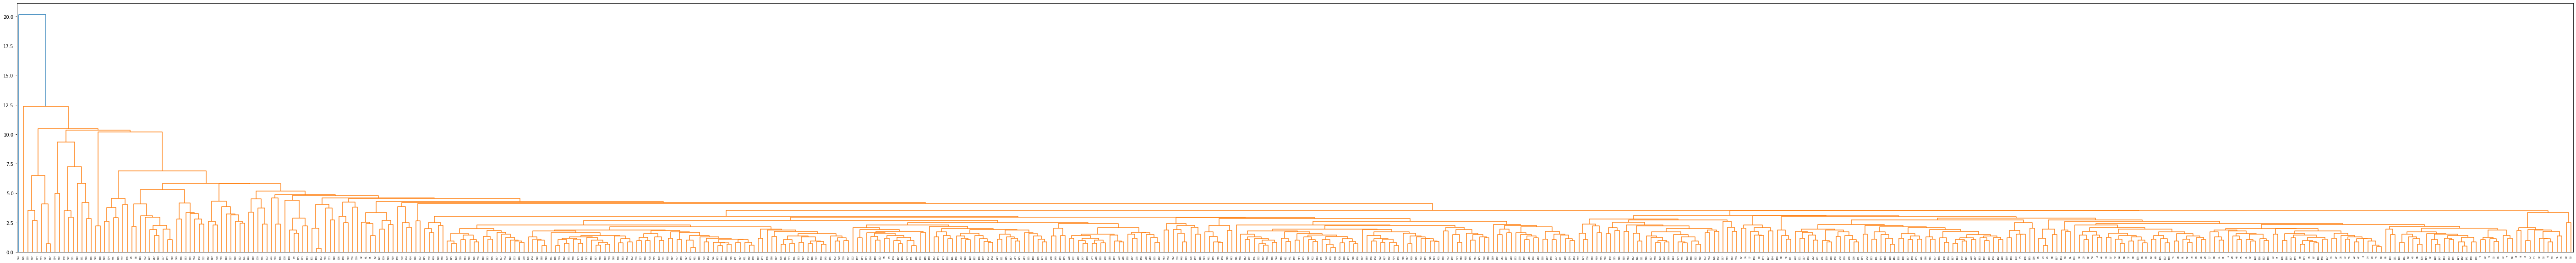

In [6]:
plt.figure(figsize=(100, 10))
dendrogram(hcv_average_matrix)
plt.show()

This laboratory has been in github and my local files for a while now, but I feel I need to upload this at least in the second lab submission. So far here we tried to make code understand what data belongs to what clusters. And it did great for Blood Donors, for others it behaved poorly, I assume we just need more observations. At this stage I don't really remember the details but if I don't upload this anywhere I will forget this existed. And once again for safety: there is not submission place in else for lab 1, and the date when this laboratory was made is shown in my github. The commit message says:
   'code is ready, need to work on the look
    JingoBongo authored and JingoBongo committed 23 days ago'
    https://github.com/JingoBongo/statisticsLabs/commits/master
So yeah, I was in a hurry and barely made that lab's code at the end day, but I saw no lab1 place in else and I held it.